# Travel Planner Based on Currency Conversion Risk

**Project Goal:**  Create a travel planning tool that will allow the user to select a set of countries they would like to travel to and a travel timeframe (3,6,12 months).  The tool will analyze historical Forex data and predict the country that will have the most favorable currency within the given travel timeframe.

**The tool will:**
Check Forex volatility as barometer for travel decisions
Use historical forex data (up to 2 years)
3 - 6 - 12 months predictive outlook using Monte Carlo and other algorithms
Produce graphs, risk graphs, value graphs,
Variables - currency / country,  traveling times (3-6-12 months)

## Import Library

In [1]:
import os
import requests
import pandas as pd
import pandas_datareader as pdr
from dotenv import load_dotenv
import numpy as np
import json
from forex_python.converter import CurrencyRates
import datetime as dt


#Interactive Plot 
import plotly.offline as pyo
#Candlestick Chart
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

%matplotlib inline

In [18]:
# Load .env enviroment variables
load_dotenv()

# Set Alpha Vantage API key 
alpha_vantage_api_key = os.getenv("ALPHA_VANTAGE_API")

# Verify that Alpha Vantage key was correctly loaded
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key)}")

Alpha Vantage Key type: <class 'str'>


## Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

    forex1.csv : Contains forex 1 

    forex2.csv: Contains forex 2
    
    forex3.csv: Contains forex 3
    
    country1.csv : Contains country 1

    country2.csv: Contains country 2
    
    country3.csv: Contains country 3
    
    weather.csv : contains weather
    
    

In [28]:
time_series = pdr.av.time_series.AVTimeSeriesReader('gbpusd', api_key='alpha_vantage_api_key')
eurusd = time_series.read()
eurusd.index = pd.to_datetime(eurusd.index, format='%Y-%m-%d')
eurusd

,open,high,low,close,volume
2003-02-24,1.5755,1.5876,1.5737,1.5849,0
2003-02-25,1.5846,1.5890,1.5700,1.5741,0
2003-02-26,1.5739,1.5837,1.5713,1.5794,0
2003-02-27,1.5790,1.5873,1.5754,1.5801,0
2003-02-28,1.5808,1.5841,1.5716,1.5733,0
...,...,...,...,...,...
2022-04-15,1.3073,1.3078,1.3043,1.3058,0
2022-04-18,1.3055,1.3064,1.3003,1.3008,0
2022-04-19,1.3008,1.3041,1.2979,1.2998,0
2022-04-20,1.2998,1.3071,1.2994,1.3061,0


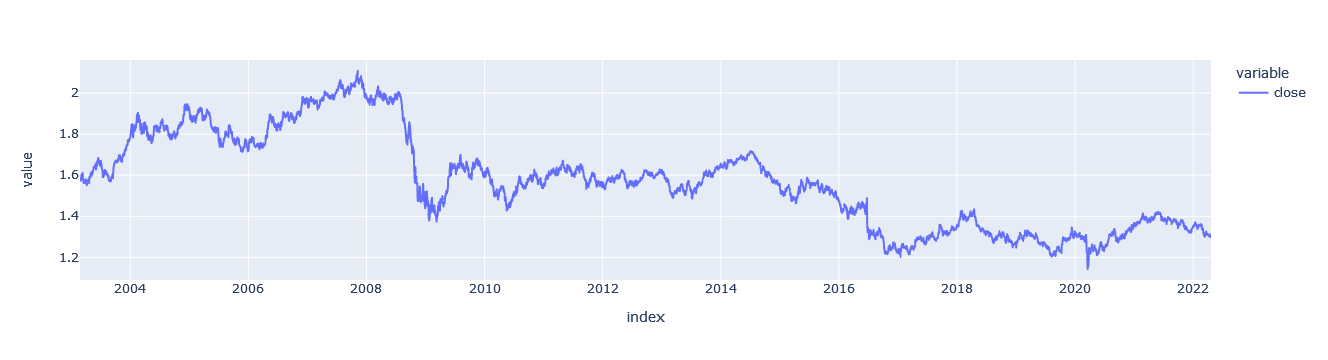

In [29]:
# plotting the opening and closing value 
eurusd[['close']].plot()

In [30]:
eurusd.describe()

,open,high,low,close,volume
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.0
mean,1.571734,1.578398,1.564840,1.571692,0.0
std,0.224729,0.225284,0.224168,0.224763,0.0
min,1.143300,1.171400,1.140800,1.143400,0.0
25%,1.365750,1.370250,1.360400,1.365850,0.0
50%,1.567900,1.573600,1.561300,1.567900,0.0
75%,1.730450,1.738100,1.721100,1.729700,0.0
max,2.107300,2.115900,2.097200,2.107200,0.0


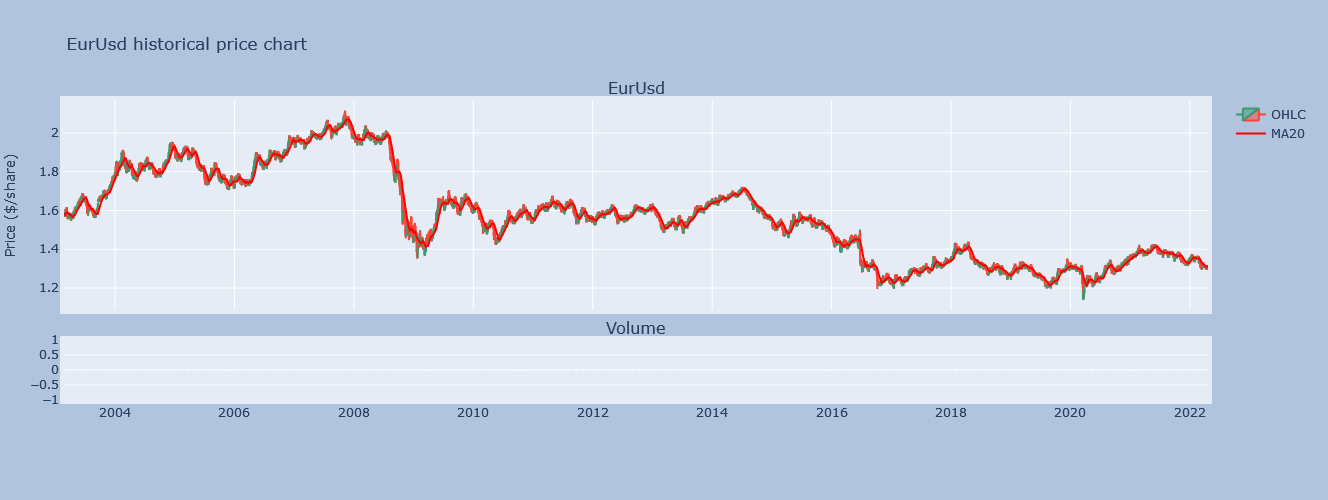

In [31]:
#20 period moving average
eurusd['MA20'] = eurusd['close'].rolling(window=20, min_periods=0).mean()
#eurusd['MA20'].head(30)

#Candlestick chart
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=('EurUsd', 'Volume'), 
               row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=eurusd.index, open=eurusd["open"], high=eurusd["high"],
                low=eurusd["low"], close=eurusd["close"], name="OHLC"), 
                row=1, col=1)
fig.add_trace(go.Scatter(x=eurusd.index, y=eurusd["MA20"], marker_color='red',name="MA20"), row=1, col=1)


fig.add_trace(go.Bar(x=eurusd.index, y=eurusd['volume'], marker_color='lime', showlegend=False), row=2, col=1)

fig.update_layout(
    title='EurUsd historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()              
              

## Read the Data for file 1

In [ ]:
# Reading forex 1

# Create a path to the file:
forex1 = Path("forex1.csv")

# # Read the CSV into a DataFrame using Pandas
dataframe = pd.read_csv(forex1, index_col="Date", infer_datetime_format=True, parse_dates=True)
dataframe.head()

In [ ]:
# Count nulls
dataframe.isnull().sum() 

# Drop nulls
dataframe = dataframe.dropna()
dataframe

## Read the Data for file 2

In [ ]:
# Reading forex 2

# Create a path to the file:
forex2 = Path("forex2.csv")

# # Read the CSV into a DataFrame using Pandas
dataframe2 = pd.read_csv(forex2, index_col="Date", infer_datetime_format=True, parse_dates=True)
dataframe2.head()

In [ ]:
# Count nulls
dataframe.isnull().sum() 

# Drop nulls
dataframe2 = dataframe2.dropna()
dataframe2

## Read the Data for file 3

In [ ]:
# Reading forex 3

# Create a path to the file:
forex3 = Path("forex3.csv")

# # Read the CSV into a DataFrame using Pandas
dataframe3 = pd.read_csv(forex3, index_col="Date", infer_datetime_format=True, parse_dates=True)
dataframe3.head()

In [ ]:
# Count nulls
dataframe3.isnull().sum() 

# Drop nulls
dataframe3 = dataframe3.dropna()
dataframe3

In [ ]:
# Check Data Types

.dtypes

In [ ]:
# Fix Data Types

# Clean identified numeric fields with $ symbol

.str.replace('$','',regex=False)


# Fix Data Types



# Foreign Exchange Currency Converter

In [23]:
currency = CurrencyRates()
amount = int(input("Enter the Amount: "))

from_currency = input("From Currency: ").upper()
to_currency = input("To Currency: ").upper()

print(from_currency, "To", to_currency, amount)

result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

Enter the Amount:  755262
From Currency:  eur
To Currency:  aud


EUR To AUD 755262
Conversion Amount:  1106685.4086
